___

# Machine Learning in Geosciences ] 
Department of Applied Geoinformatics and Carthography, Charles University

Lukas Brodsky lukas.brodsky@natur.cuni.cz

## Example of PyTorch convolution

In [ ]:
import os 
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
os.listdir('./')

In [ ]:
# data 
transform = transforms.ToTensor()
test_data = datasets.MNIST(root='./data', download=True, train=False, transform=transform)

# data = datasets.EuroSAT(root='./data', download=True, target_transform=transform)


In [ ]:
test_loader = DataLoader(dataset=test_data , batch_size=10, shuffle=False)
for images, labels in test_loader: 
    break

In [ ]:
image = images[0]
image.shape
plt.imshow(image.detach().numpy()[0, :, :], cmap='gray')

### Convolution

In [ ]:
image.shape

`nn.Conv2d()`

nn.Conv2d(
    in_channels, 
    out_channels, 
    kernel_size, 
    stride, 
    padding, 
    device=None
)

* `in_channels` number of input channels 

* `out_channels` number of outpu channels 

* `kernel_size` size of the convolution kernel 

* `stride` controls the stride of the kernel 

* `padding` controls the amount of padding pixels  applied to the input
  
* `device` either CPU or GPU 


In [ ]:
conv = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,stride=1, padding=1)

In [ ]:
conv

In [ ]:
image_conv = conv(image)

In [ ]:
image_conv.shape

In [ ]:
plt.imshow(image_conv.detach().numpy()[0, :, :], cmap='gray', interpolation ='nearest')

In [ ]:
conv.weight.size()

In [ ]:
conv.weight = nn.Parameter(torch.ones((1, 1, 3, 3)))
conv.weight

In [ ]:
image_conv = conv(image)
plt.imshow(image_conv.detach().numpy()[0, :, :], cmap='gray', interpolation ='nearest')

In [ ]:
conv.weight = nn.Parameter(torch.zeros((1, 1, 3, 3)))
conv.weight

In [ ]:
image_conv = conv(image)
plt.imshow(image_conv.detach().numpy()[0, :, :], cmap='gray', interpolation ='nearest')

#### High pass filter 
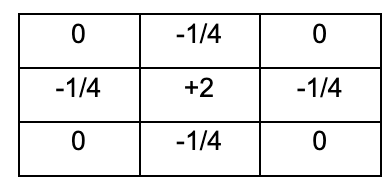

In [ ]:
hp = [
      [  0.0, -0.25, 0.0 ], 
      [-0.25,  2.0, -0.25], 
      [  0.0, -0.25, 0.0 ]
     ]

In [ ]:
plt.imshow(hp)
plt.colorbar()

In [ ]:
hp_torch = torch.FloatTensor(hp)

In [ ]:
hp_torch

In [ ]:
conv.weight = nn.Parameter(torch.reshape(hp_torch, (1, 1, 3, 3)))
conv.weight

In [ ]:
image_conv = conv(image)
plt.imshow(image_conv.detach().numpy()[0, :, :], cmap='gray', interpolation ='nearest')

### Question: 
If a 28x28 image is passed through a Convolutional layer using a 5x5 filter, a step size of 1,  and no padding, what is the resulting matrix size?
